<a href="https://colab.research.google.com/github/woo2201/sampleCases/blob/reservior/HomeCreditDefault_v2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/dataset/home-credit-default-risk/

/content/drive/MyDrive/dataset/home-credit-default-risk


In [ ]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.4f' % x)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
path = "/content/drive/MyDrive/dataset/home-credit-default-risk/"
filenames = glob.glob(path + "*.csv")
data = [var.split('.')[0].split('/')[-1] for var in filenames]

In [ ]:
# dynamically allocate df names.
df_list = []
for name in zip(filenames, data):
    loc = list(name)[0]
    val = list(name)[1]
    if not val.startswith('HomeCredit'):
        df_list.append(val)
        globals()[val] = pd.read_csv(loc) # encoding = 'ISO-8859-1'

In [ ]:
for df in df_list:
    print(df)

POS_CASH_balance
application_test
application_train
bureau
bureau_balance
credit_card_balance
installments_payments
previous_application
sample_submission


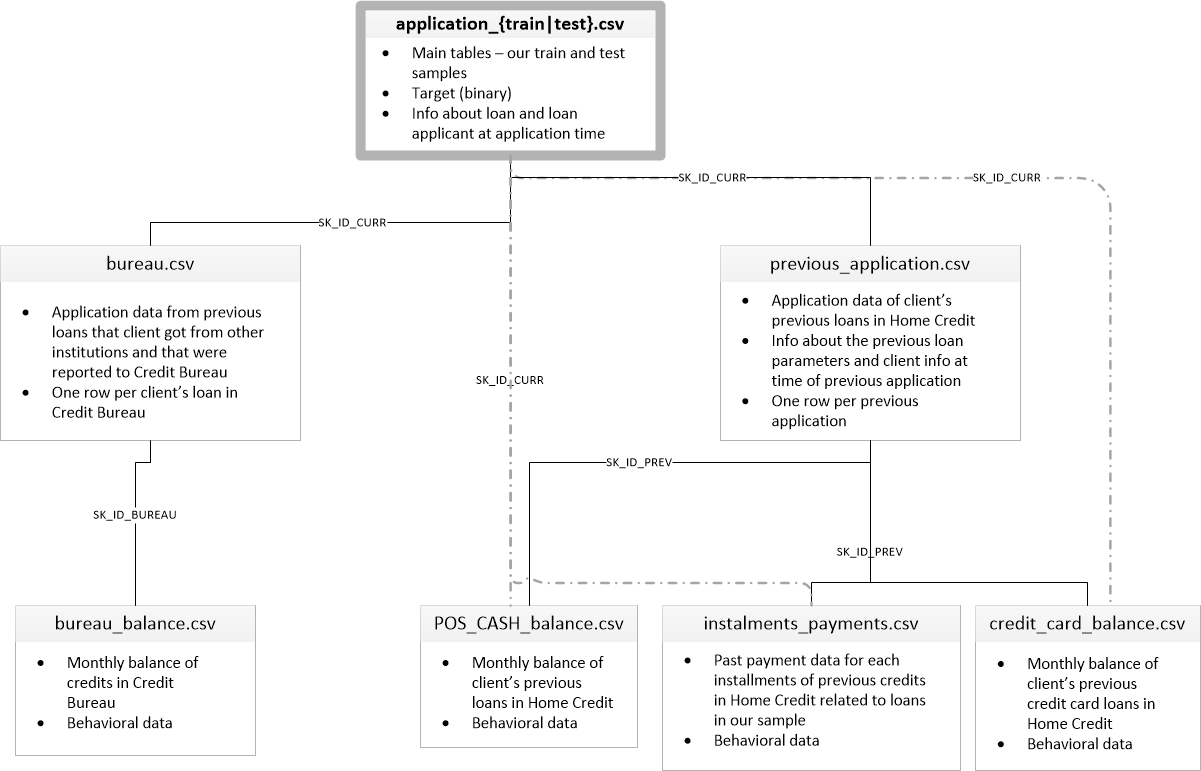

# application_train and test.

Main Tables. Need to be merged



In [ ]:
print(application_train.shape, application_test.shape)

(307511, 122) (48744, 121)


In [ ]:
target = application_train.TARGET

In [ ]:
application = pd.concat([application_train.drop(['TARGET'], axis = 1),
                         application_test], axis = 0)

In [ ]:
application.insert(1, "CLSF", ['train'] * application_train.shape[0] + ['test'] * application_test.shape[0])

In [ ]:
for i in application.dtypes[application.dtypes == 'object'].index:
    if i != 'CLSF':
        application[i] = application[i].astype('category').cat.codes

In [ ]:
application.sample(5)

,SK_ID_CURR,CLSF,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
26188,290693,test,0,0,0,1,0,180000.0000,794173.5000,33646.5000,697500.0000,6,7,4,1,1,0.0226,-17349,-1756,-4089.0000,-885,NaN,1,1,0,1,0,0,1,2.0000,2,2,2,9,0,0,0,0,0,0,7,0.6606,0.2212,0.5989,0.0598,0.0661,0.9896,0.8572,0.0328,0.0000,0.2069,0.1667,0.2083,0.0868,0.0454,0.0787,0.0154,0.0663,0.0609,0.0686,0.9896,0.8628,0.0331,0.0000,0.2069,0.1667,0.2083,0.0887,0.0496,0.0820,0.0156,0.0702,0.0604,0.0661,0.9896,0.8591,0.0330,0.0000,0.2069,0.1667,0.2083,0.0883,0.0462,0.0802,0.0155,0.0677,-1,0,0.0943,5,0,0.0000,0.0000,0.0000,0.0000,-786.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000
76832,189097,train,0,0,0,1,2,112500.0000,545040.0000,35617.5000,450000.0000,6,7,2,1,1,0.0313,-11091,-1800,-4744.0000,-2749,NaN,1,1,1,1,1,0,14,4.0000,2,2,6,12,0,0,0,0,0,0,42,0.2896,0.2528,0.4579,0.0227,0.0545,0.9821,0.7552,0.0036,0.0000,0.1034,0.0417,0.0833,0.0000,0.0185,0.0187,0.0000,0.0090,0.0231,0.0566,0.9821,0.7648,0.0036,0.0000,0.1034,0.0417,0.0833,0.0000,0.0202,0.0194,0.0000,0.0095,0.0229,0.0545,0.9821,0.7585,0.0036,0.0000,0.1034,0.0417,0.0833,0.0000,0.0188,0.0190,0.0000,0.0091,2,0,0.0166,5,0,0.0000,0.0000,0.0000,0.0000,0.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
71332,182724,train,0,0,1,1,0,270000.0000,451102.5000,24601.5000,337500.0000,6,1,4,0,1,0.0308,-12140,-2241,-5584.0000,-146,0.0000,1,1,1,1,0,1,10,2.0000,2,2,1,15,0,0,0,0,0,0,38,0.3918,0.0418,0.0701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,-1,-1,0.0000,0.0000,0.0000,0.0000,-269.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,2.0000,1.0000,2.0000
182057,311017,train,1,0,0,1,1,121500.0000,382500.0000,19125.0

In [ ]:
application_summary = (
                        application_train
                            [['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE',
                            'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                            'CNT_CHILDREN', 'AMT_INCOME_TOTAL']]
                      )

In [ ]:
for i in application_summary.dtypes[application_summary.dtypes == 'object'].index:
        application_summary[i] = application_summary[i].astype('category').cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# application.CODE_GENDER.value_counts() # code gender == 2 ...??
# application.NAME_CONTRACT_TYPE.value_counts() # cashloan = 0 revolving loan = 1
# application_train.CODE_GENDER.value_counts() # female > male > XNA

F      202448
M      105059
XNA    4     
Name: CODE_GENDER, dtype: int64

In [ ]:
application_summary.groupby(['TARGET']).agg({'NAME_CONTRACT_TYPE' : 'mean',
                                             'SK_ID_CURR' : 'count',
                                             'CODE_GENDER' : 'mean',
                                             'FLAG_OWN_CAR' : 'mean',
                                             'FLAG_OWN_REALTY' : 'mean',
                                             'CNT_CHILDREN' : 'mean',
                                             'AMT_INCOME_TOTAL' : 'mean'}).transpose()

TARGET,0,1
NAME_CONTRACT_TYPE,0.0979,0.0646
SK_ID_CURR,282686.0000,24825.0000
CODE_GENDER,0.3340,0.4292
FLAG_OWN_CAR,0.3432,0.3052
FLAG_OWN_REALTY,0.6945,0.6841
CNT_CHILDREN,0.4129,0.4638
AMT_INCOME_TOTAL,169077.7223,165611.7609


In [ ]:
application.sample(3)

,SK_ID_CURR,CLSF,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
34775,140292,train,0,0,0,1,0,112500.0000,450000.0000,21109.5000,450000.0000,5,3,4,1,1,0.0264,-22815,365243,-4337.0000,-4664,NaN,1,0,0,1,1,0,-1,2.0000,2,2,0,11,0,0,0,0,0,0,57,NaN,0.6128,0.7136,0.0722,NaN,0.9935,NaN,NaN,0.1200,0.1034,0.2500,NaN,NaN,NaN,0.0834,NaN,0.0000,0.0735,NaN,0.9935,NaN,NaN,0.1208,0.1034,0.2500,NaN,NaN,NaN,0.0869,NaN,0.0000,0.0729,NaN,0.9935,NaN,NaN,0.1200,0.1034,0.2500,NaN,NaN,NaN,0.0849,NaN,0.0000,-1,0,0.0656,4,0,8.0000,0.0000,8.0000,0.0000,-192.0000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
30678,322961,test,0,0,0,1,0,90000.0000,247500.0000,29502.0000,247500.0000,6,7,2,0,1,0.0182,-10478,-1616,-4341.0000,-2344,NaN,1,1,0,1,0,1,-1,2.0000,3,3,0,7,0,0,0,0,1,1,16,0.5999,0.4483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,-1,-1,7.0000,0.0000,7.0000,0.0000,-496.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
193871,324813,train,0,0,0,0,0,153000.0000,755190.0000,36459.0000,675000.0000,6,7,4,1,2,0.0145,-17202,-384,-2634.0000,-759,NaN,1,1,1,1,0,0,14,2.0000,2,2,0,9,0,0,0,0,1,1,42,NaN,0.4704,0.2837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,-1,-1,0.0000,0.0000,0.0000,0.0000,-1038.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000


In [ ]:
(
    application
        .isnull()
        .sum()
        .to_frame('NA_count')
        .query('NA_count != 0')
)

,NA_count
AMT_ANNUITY,36
AMT_GOODS_PRICE,278
OWN_CAR_AGE,235241
CNT_FAM_MEMBERS,2
EXT_SOURCE_1,193910
EXT_SOURCE_2,668
EXT_SOURCE_3,69633
APARTMENTS_AVG,179948
BASEMENTAREA_AVG,207584
YEARS_BEGINEXPLUATATION_AVG,172863


# Bureau

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

CB사에 보고된, 타 금융기관으로부터 제공받은 모든 사용자들의 이전 credits 이용 기록.
우리 샘플 내 모든 Loan 에 대한 기록에는, application dates 이전에 받은 모든 credits 관련 기록들이 있습니다. 최대한 많이요!

In [ ]:
bureau.shape

(1716428, 17)

In [ ]:
bureau.sample(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
1144523,106121,6758753,Closed,currency 1,-1539,0,-1327.0000,-1357.0000,NaN,0,29033.2800,0.0000,NaN,0.0000,Consumer credit,-844,0.0000
748793,424213,6629714,Closed,currency 1,-2391,0,-2177.0000,-2297.0000,NaN,0,36364.1400,0.0000,NaN,0.0000,Consumer credit,-773,NaN
537082,385868,5486929,Closed,currency 1,-2728,0,-2362.0000,-2357.0000,NaN,0,135000.0000,NaN,NaN,0.0000,Consumer credit,-2357,NaN
806223,129913,6379136,Closed,currency 1,-2770,0,-41855.0000,-706.0000,0.0000,0,0.0000,0.0000,0.0000,0.0000,Credit card,-706,NaN
1487352,416428,6115401,Active,currency 1,-1250,0,577.0000,NaN,NaN,0,472500.0000,203701.5000,0.0000,0.0000,Consumer credit,-6,NaN


In [ ]:
# bureau.shape[0]/bureau.SK_ID_CURR.nunique() # one person on average has 5.6 records.

(bureau.SK_ID_CURR.nunique() * bureau.SK_ID_BUREAU.nunique()) /bureau.SK_ID_CURR.nunique()
#bureau[bureau.SK_ID_CURR == 385868]

1716428.0

# bureau_balance

Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

In [ ]:
bureau_balance.shape

(27299925, 3)

In [ ]:
bureau_balance

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X
